# Notebook to examine relationships only between ET, P and Snowpack

Discharge isnt really necessary if I make the assumption that $Q = P - ET$.

I assume that AFX and Niwot SnoTel are close enough to be co-located.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy as sp
import glob
import calendar

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

## Load AFX
### Header info
- YEAR : year
- GAP : unknown, maybe if a gap was present
- DTIME : day of year (DOY) and decimal time
- DOY : day of year
- HRMIN 
- UST  [m/s]
- TA [deg C] : air temperature
- WD [deg] : wind direction
- NEE [umol/m2/s] : Net Ecosystem Exchange
- FC [umol/m2/s] : Carbon Flux
- SFC [umol/m2/s] 
- H [W/m2] 
- SH [W/m2] 
- LE [W/m2] 
- SLE [W/m2] 
- FG [W/m2] 
- TS1 [deg C] : Soil temp 1
- TSdepth1 [cm] : Depth of 1st soil temp.
- TS2 [deg C] : Soil temp 2
- TSdepth2 [cm] : Depth of 2nd soil temp.
- PREC [mm] : precipitation   
- RH [%] : relative humidity
- PRESS [kPa] : air pressure
- VPD [umol/mol] : vapor pressure deficit 
- CO2 [kPa] : partial pressure of CO2 
- SWC1 [%] : soil moisture 1   
- SWC2 [%] : soil moisture 2
- PAR [W/m2] : photosynthetically active radiation   
- Rn [umol/m2/s]  : net radiation
- Rg [W/m2]  
- Rgdif [W/m2]  
- PARout [umol/m2/s]  
- RgOut [W/m2]  
- Rgl [W/m2]  
- RglOut [W/m2]   
- H2O [mmol/mol]  
- RE [umol/m2/s]  
- GPP [umol/m2/s]   
- CO2top [umol/mol]  
- CO2height [m]
- APAR [umol/m2/s]   
- PARdif [umol/m2/s]   
- APARpct [%]   
- ZL [unitless]

In [3]:
afx = pd.read_pickle('../../greenness_timing/ameriflux/niwot/AFX_niwot.pcl')
#afx2 = pd.read_pickle('../../greenness_timing/ameriflux/niwot/AFX_niwot_yearly.pcl')

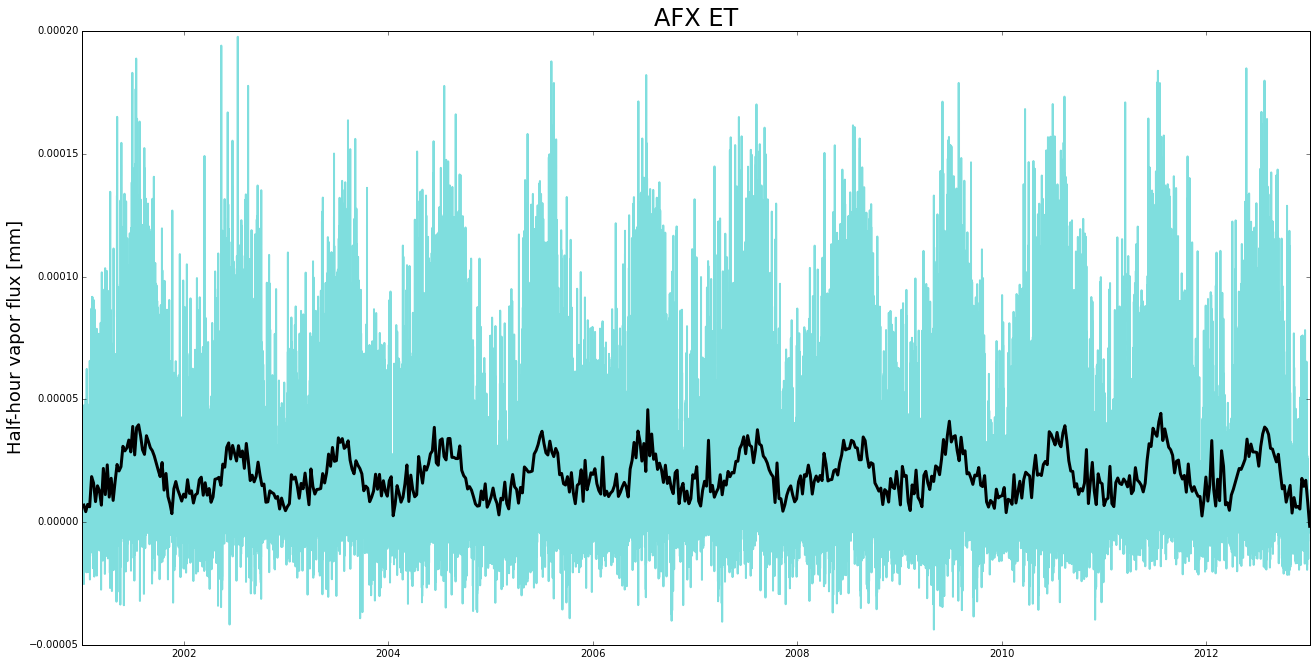

In [4]:
plt.plot(afx.index, afx.ET, 'c', lw=2, alpha=0.5)
plt.plot(afx.resample('%W',how='mean').index, afx.resample('%W',how='mean').ET, 'k',lw = 3)
plt.title('AFX ET', fontsize=24)
plt.ylabel('Half-hour vapor flux [mm]', fontsize = 18);

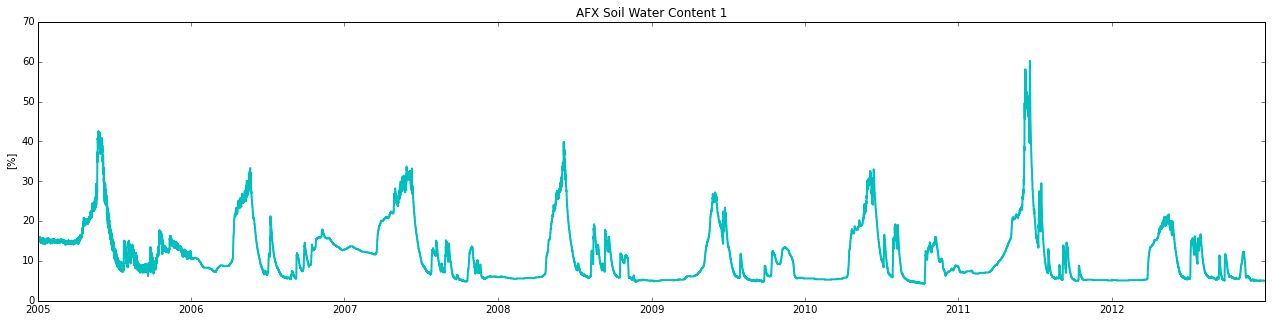

In [5]:
plt.subplot(2,1,1)
plt.plot(afx['2005':'2012'].index, afx['2005':'2012'].SWC1,'c-', lw = 2);
plt.title('AFX Soil Water Content 1');
plt.ylabel('[%]');
plt.savefig('./figures/AFX_SWC.pdf', bbox_inches = 'tight')

## Load Precip

In [7]:
wx = pd.read_pickle('../../greenness_timing/NOAA_CRN/boulder_co/boulder_co.pcl')
wx = wx.sort()
wx.index.min()

Timestamp('2003-09-27 00:00:00')

In [8]:
## compute snow

maxthresh = 2. # maximum air temperature snow threshold
minthresh = 0. # threshold for 100% snow

for day in wx.index:
    
    # write NaNs to days without Data
    if np.isnan(wx.Tmax[day]) == 1:
        wx.loc[day,'snow'] = np.NaN
        continue
    if np.isnan(wx.Tmin[day]) == 1:
        wx.loc[day,'snow'] = np.NaN
        continue
        
    # if the max air temp does not rise above minthreshold then all the precip is snow.
    if wx.Tmax[day] <= minthresh:
        wx.loc[day,'snow'] = wx.P[day]
        
    # if the minimum air temp rises above maxthreshold then all the precip is rain
    if wx.Tmin[day] > maxthresh:
        wx.loc[day,'snow'] = 0.
    
    # if the max air temperature is less or equal to maxthreshold and above minthresh then a portion of the precip is snow.
    if (wx.Tmax[day] <= maxthresh) and (wx.Tmax[day] > minthresh):
        # compute linear mixed snow coef based on max and min air temp. 
        coef = 1.-(1./(wx.Tmax[day] - wx.Tmin[day]))
        wx.loc[day,'snow'] = wx.P[day]*coef

In [9]:
wx.snow.describe()

count    2284.000000
mean        2.131047
std         5.032128
min         0.000000
25%         0.000000
50%         0.000000
75%         1.703897
max        72.100000
Name: snow, dtype: float64

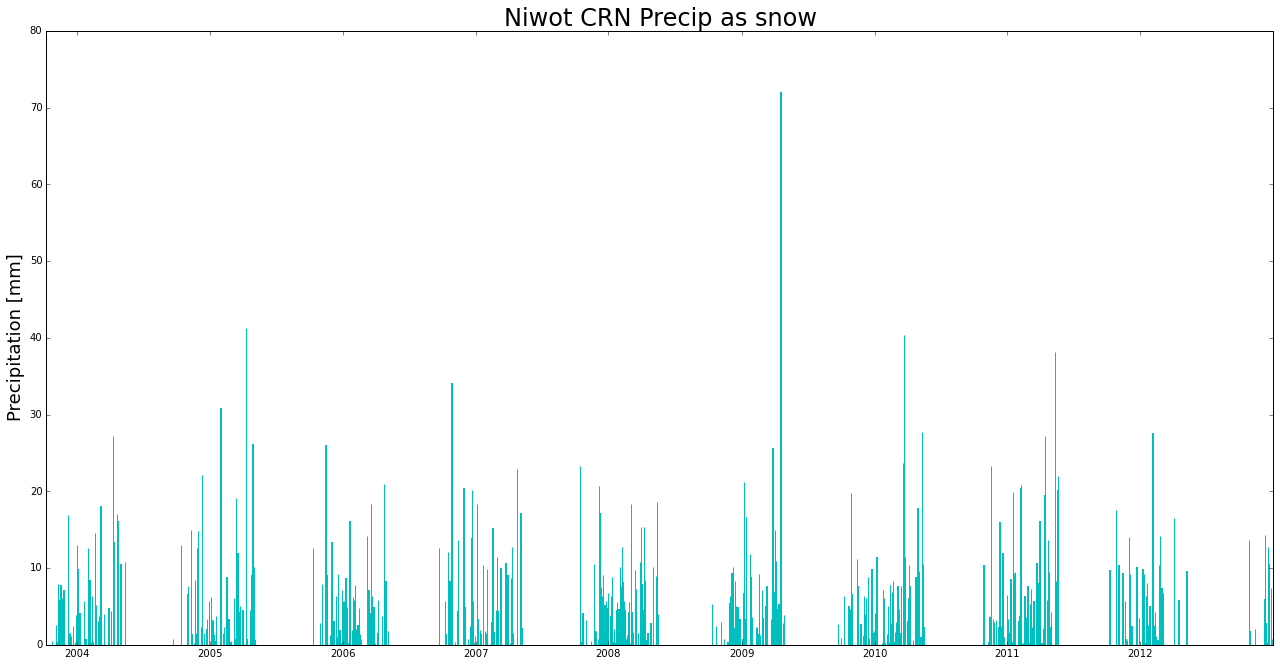

In [10]:
plt.bar(wx['2001-01-01':'2012-12-31'].index,wx['2001-01-01':'2012-12-31'].snow, facecolor = 'c', edgecolor = 'c')
plt.title('Niwot CRN Precip as snow', fontsize=24)
plt.ylabel('Precipitation [mm]', fontsize=18);

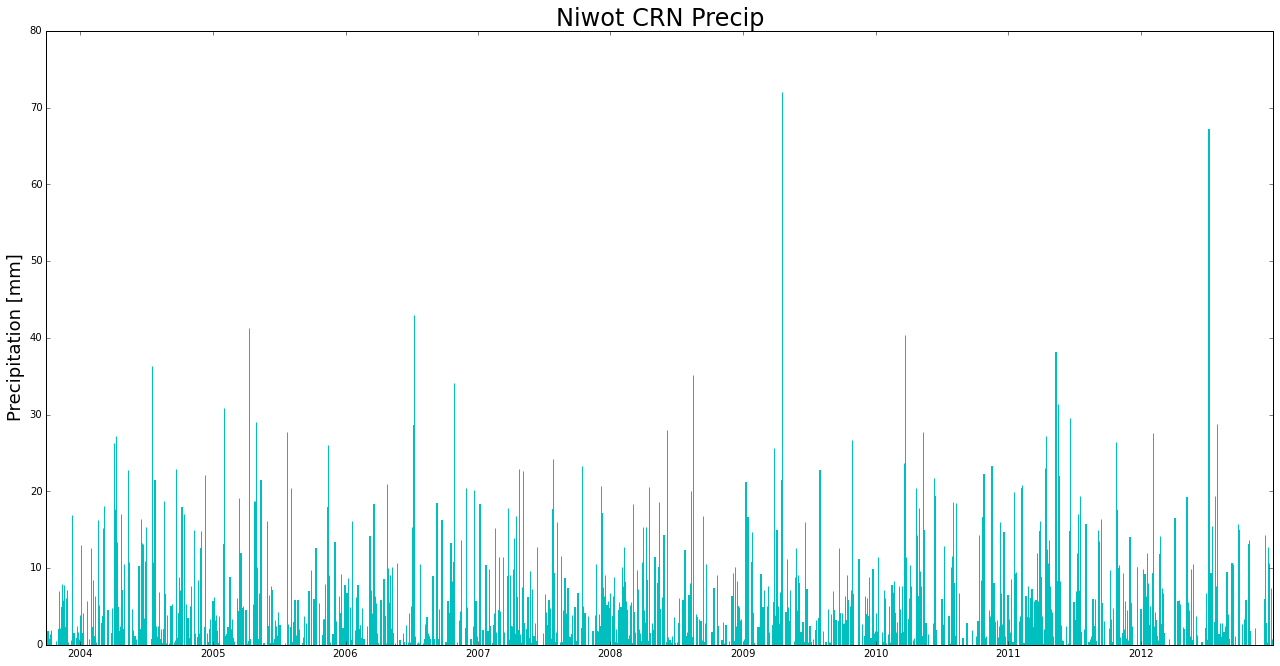

In [11]:
plt.bar(wx['2001-01-01':'2012-12-31'].index,wx['2001-01-01':'2012-12-31'].P, facecolor = 'c', edgecolor = 'c')
plt.title('Niwot CRN Precip', fontsize=24)
plt.ylabel('Precipitation [mm]', fontsize=18);

## Load SWE

In [12]:
niwot = pd.read_pickle('/Users/barnhatb/Dropbox/CUB/ET magnitude and snowmelt/data/snotel/niwot_663/niwot.pcl')

In [13]:
niwot.describe()

,siteid,swe,precip,t,tmax,tmin,tave
count,4395,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000
mean,663,99.038039,362.329989,-0.935995,7.794334,-4.334130,1.940842
std,0,117.621736,242.438796,10.069446,18.963625,10.816309,10.723929
min,663,0.000000,0.000000,-99.900000,-99.900000,-99.900000,-99.900000
25%,663,0.000000,144.780000,-5.250000,1.800000,-8.800000,-3.600000
50%,663,43.180000,340.360000,0.100000,9.600000,-2.600000,2.500000
75%,663,180.340000,585.470000,4.900000,18.100000,1.600000,9.100000
max,663,454.660000,894.080000,17.400000,46.700000,13.700000,19.700000


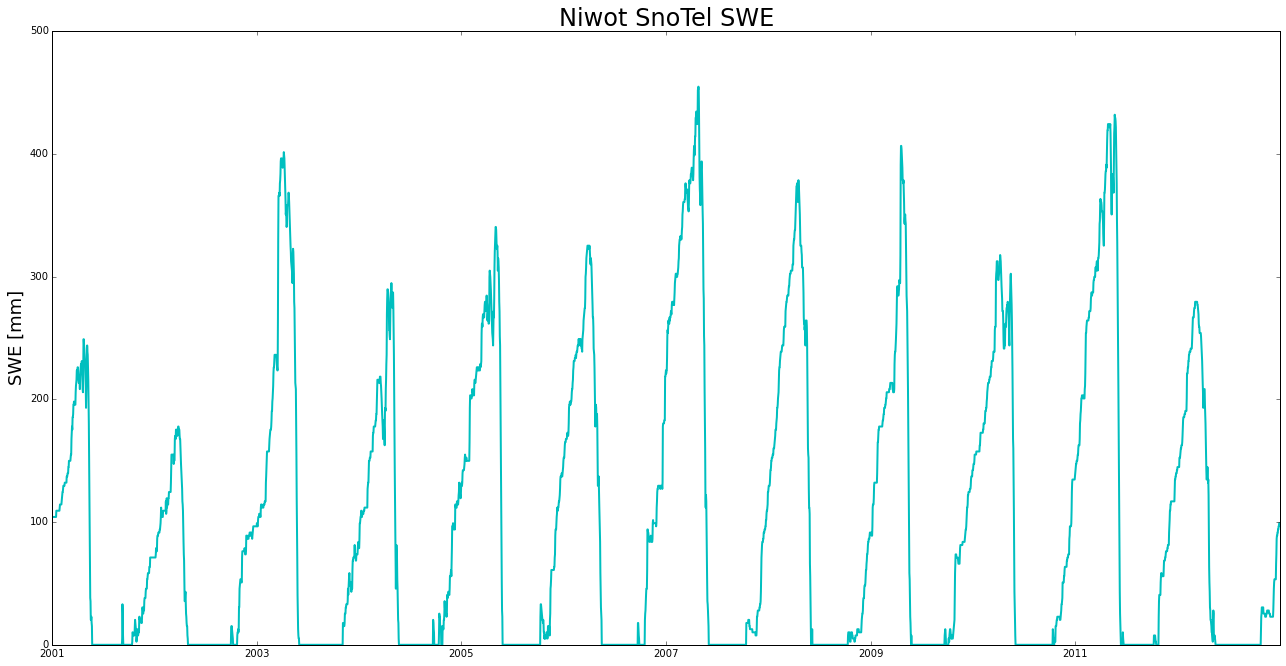

In [14]:
plt.plot(niwot.index, niwot.swe,'c',lw=2)
plt.title('Niwot SnoTel SWE', fontsize = 24)
plt.ylabel('SWE [mm]', fontsize = 18);

## Load SWE Metrics

In [54]:
SWE = pd.read_pickle('./data/AMS_snowpack_metrics.pcl')[0:-3]

In [55]:
SWE

,peakswe,peakswedate,snowfreedate,ablationrate,ablationseason,growseasonlength
2006,4.758252,2006-04-08 00:00:00,2006-05-25 00:00:00,0.1012394,47,175
2007,17.47393,2007-04-27 00:00:00,2007-06-14 00:00:00,0.3640402,48,156
2008,13.24407,2008-05-12 00:00:00,2008-06-10 00:00:00,0.4566922,29,141
2009,12.77258,2009-04-25 00:00:00,2009-06-05 00:00:00,0.3115264,41,158
2010,12.62745,2010-05-16 00:00:00,2010-06-07 00:00:00,0.5739751,22,137
2011,19.17565,2011-05-24 00:00:00,2011-06-24 00:00:00,0.6185693,31,129


# Extract Similar metrics for ET and P

### P

In [56]:
wyears = SWE.index # grab the water years
print wyears

fall = range(10,13)
print 'Fall: '+str(fall)
winter = range(1,4)
print 'Winter: '+str(winter)
spring = range(4,7)
print 'Spring: '+str(spring)
summer = range(7,10)
print 'Summer: '+str(summer)

cool = range(10,13)+range(1,5)
print 'Cool: '+str(cool)
warm = range(5,10)
print 'Warm: '+str(warm)

Int64Index([2006, 2007, 2008, 2009, 2010, 2011], dtype='int64')
Fall: [10, 11, 12]
Winter: [1, 2, 3]
Spring: [4, 5, 6]
Summer: [7, 8, 9]
Cool: [10, 11, 12, 1, 2, 3, 4]
Warm: [5, 6, 7, 8, 9]


In [57]:
#cols = ['wyP','coolP','springP','summerP']
cols = ['wyP','snowFraction','coolP','warmP','springP','summerP','fallP','winterP']

P = pd.DataFrame(np.zeros([len(wyears),len(cols)]),index=wyears, columns=cols)

for year in wyears:
    P.loc[year, 'wyP'] = np.sum(wx.loc[str(year-1)+'-10-01':str(year)+'-09-30'].P)
    P.loc[year, 'snowFraction'] = np.sum(wx.loc[str(year-1)+'-10-01':str(year)+'-09-30'].snow)
    
    # Extract end dates for the seasons
    
    coolend = calendar.monthrange(year-1,cool[-1])[-1] 
    warmend = calendar.monthrange(year,warm[-1])[-1]
    
    fallend = calendar.monthrange(year-1,fall[-1])[-1]
    winterend = calendar.monthrange(year,winter[-1])[-1]
    springend = calendar.monthrange(year,spring[-1])[-1]
    summerend = calendar.monthrange(year,summer[-1])[-1]
    
    coolstartdate = str(year-1)+'-'+str(cool[0])+'-01'
    coolenddate = str(year)+'-'+str(cool[-1])+'-'+str(coolend)
    
    warmstartdate = str(year)+'-'+str(warm[0])+'-01'
    warmenddate = str(year)+'-'+str(warm[-1])+'-'+str(warmend)
    
    
    fallstartdate = str(year-1)+'-'+str(fall[0])+'-01'
    fallenddate = str(year-1)+'-'+str(fall[-1])+'-'+str(fallend)
    
    winterstartdate = str(year)+'-'+str(winter[0])+'-01'
    winterenddate = str(year)+'-'+str(winter[-1])+'-'+str(winterend)
    
    springstartdate = str(year)+'-'+str(spring[0])+'-01'
    springenddate = str(year)+'-'+str(spring[-1])+'-'+str(springend)
    
    summerstartdate = str(year)+'-'+str(summer[0])+'-01'
    summerenddate = str(year)+'-'+str(summer[-1])+'-'+str(summerend)
    
    
    P.loc[year, 'coolP'] = np.sum(wx.loc[coolstartdate:coolenddate].P)
    P.loc[year, 'warmP'] = np.sum(wx.loc[warmstartdate:warmenddate].P)
    
    P.loc[year, 'fallP'] = np.sum(wx.loc[fallstartdate:fallenddate].P)
    
    P.loc[year, 'winterP'] = np.sum(wx.loc[winterstartdate:winterenddate].P)
    
    P.loc[year, 'springP'] = np.sum(wx.loc[springstartdate:springenddate].P)
    
    P.loc[year, 'summerP'] = np.sum(wx.loc[summerstartdate:summerenddate].P)
    
    
P.snowFraction /= P.wyP

In [58]:
warm

[5, 6, 7, 8, 9]

In [59]:
coolend = calendar.monthrange(year-1,cool[-1])[-1] 

In [60]:
coolend

30

In [61]:
P.wyP - np.sum([P.coolP, P.warmP])

2006   -4163.2
2007   -4092.3
2008   -4024.2
2009   -4091.5
2010   -4052.1
2011   -3824.7
Name: wyP, dtype: float64

In [62]:
P.wyP - np.sum([P.fallP, P.winterP, P.springP, P.summerP])

2006   -4163.2
2007   -4092.3
2008   -4024.2
2009   -4091.5
2010   -4052.1
2011   -3824.7
Name: wyP, dtype: float64

In [63]:
P.wyP

2006     686.4
2007     757.3
2008     825.4
2009     758.1
2010     797.5
2011    1024.9
Name: wyP, dtype: float64

### ET

In [64]:
SWE

,peakswe,peakswedate,snowfreedate,ablationrate,ablationseason,growseasonlength
2006,4.758252,2006-04-08 00:00:00,2006-05-25 00:00:00,0.1012394,47,175
2007,17.47393,2007-04-27 00:00:00,2007-06-14 00:00:00,0.3640402,48,156
2008,13.24407,2008-05-12 00:00:00,2008-06-10 00:00:00,0.4566922,29,141
2009,12.77258,2009-04-25 00:00:00,2009-06-05 00:00:00,0.3115264,41,158
2010,12.62745,2010-05-16 00:00:00,2010-06-07 00:00:00,0.5739751,22,137
2011,19.17565,2011-05-24 00:00:00,2011-06-24 00:00:00,0.6185693,31,129


In [65]:
afx.index.max()

Timestamp('2012-12-31 23:30:00')

In [66]:
wyears

Int64Index([2006, 2007, 2008, 2009, 2010, 2011], dtype='int64')

## Problems here...

In [67]:
cols = ['wyET','growET','aveGrowET']

ET = pd.DataFrame(np.zeros([len(wyears),len(cols)]),index=wyears, columns=cols)

for year in wyears:
    ET.loc[year,'wyET'] = np.sum(afx.loc[str(year-1)+'-10-01':str(year)+'-09-30'].tot_ET) # compute water year ET
    
    strt = SWE.ix[year].peakswedate
    
    ET.loc[year,'growET'] = np.sum(afx.loc[str(strt.year)+'-'+str(strt.month)+'-'+str(strt.day):str(year)+'-09-30'].tot_ET)
    
    ET.loc[year,'aveGrowET'] = ET.loc[year,'growET']/SWE.loc[year,'growseasonlength']
    

In [68]:
ET

,wyET,growET,aveGrowET
2006,618.061701,369.313047,2.110360
2007,630.939326,367.622453,2.356554
2008,641.237630,339.699444,2.409216
2009,609.334106,363.156291,2.298458
2010,592.750001,329.382040,2.404248
2011,648.274141,347.027020,2.690132


### Derived Metrics

In [69]:
cols = ['wyPartitioning','growPartitioning','peakSWEFrac', 'wyGrowPartitioningSWE']

MET = pd.DataFrame(np.zeros([len(wyears),len(cols)]),index=wyears, columns=cols)

for year in wyears:
    MET.loc[year,'wyPartitioning'] = ET.loc[year,'wyET'] / P.loc[year,'wyP']
    MET.loc[year,'growPartitioning'] = ET.loc[year,'growET'] / P.loc[year,'wyP']
    MET.loc[year,'peakSWEFrac'] = SWE.loc[year,'peakswe']/ P.loc[year,'wyP']
    MET.loc[year,'wyGrowPartitioningSWE'] = ET.loc[year,'growET']/ SWE.loc[year,'peakswe']
    

In [70]:
MET

,wyPartitioning,growPartitioning,peakSWEFrac,wyGrowPartitioningSWE
2006,0.900440,0.538043,0.006932,77.615272
2007,0.833143,0.485438,0.023074,21.038339
2008,0.776881,0.411557,0.016046,25.649165
2009,0.803765,0.479035,0.016848,28.432486
2010,0.743260,0.413018,0.015834,26.084599
2011,0.632524,0.338596,0.018710,18.097277


# Plots

In [71]:
from scipy import stats

def linpred(slope,intercept,xvals):
    yvals = (xvals*slope)+intercept
    return yvals

**With 2008:**
pValue: 0.00954363005167
Slope: -0.439183232764
Intercept: 0.959248388352

**Without 2008:**
pValue: 0.0246453336649
Slope: -0.445672624592
Intercept: 0.95816351743


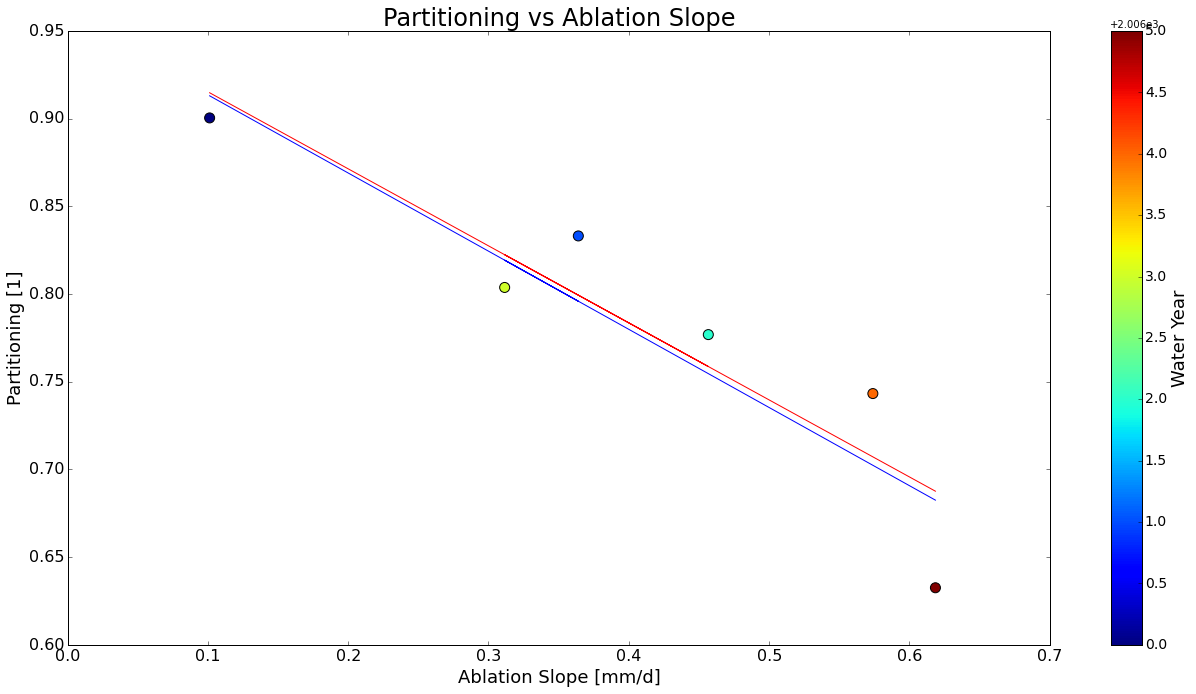

In [72]:
ttl = 'Partitioning vs Ablation Slope'
x = SWE.ablationrate
xlab = 'Ablation Slope [mm/d]'
y = MET.wyPartitioning
ylab = 'Partitioning [1]'

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = SWE.index)
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = 18)


plt.title(ttl, fontsize = 24)
plt.ylabel(ylab, fontsize = 18)
plt.xlabel(xlab, fontsize = 18)
plt.plot(x, yvals, 'r-')

## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')
ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
cb.ax.tick_params(labelsize=14) 
############################################
print '**With 2008:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)
print
print '**Without 2008:**'
print 'pValue: ' + str(p_value2)
print 'Slope: ' + str(slope2)
print 'Intercept: ' + str(intercept2)

**Figure 1:** Water year precipitation partitiong versus ablation slope. Aside from 2008(?) more water is partitioned to ET with slower ablation. 

In [73]:
# Plotting parameters for poster figs

titlefont = 40
axfont = 30
axtickfont = 26

legendfontsize = 30

pointsize = 800

eqtext = 30

# turn on if you want to output figures
printfigs = False
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

annotatey = [0.85,0.82,0.79,0.76,0.72,0.69,0.66,0.63]

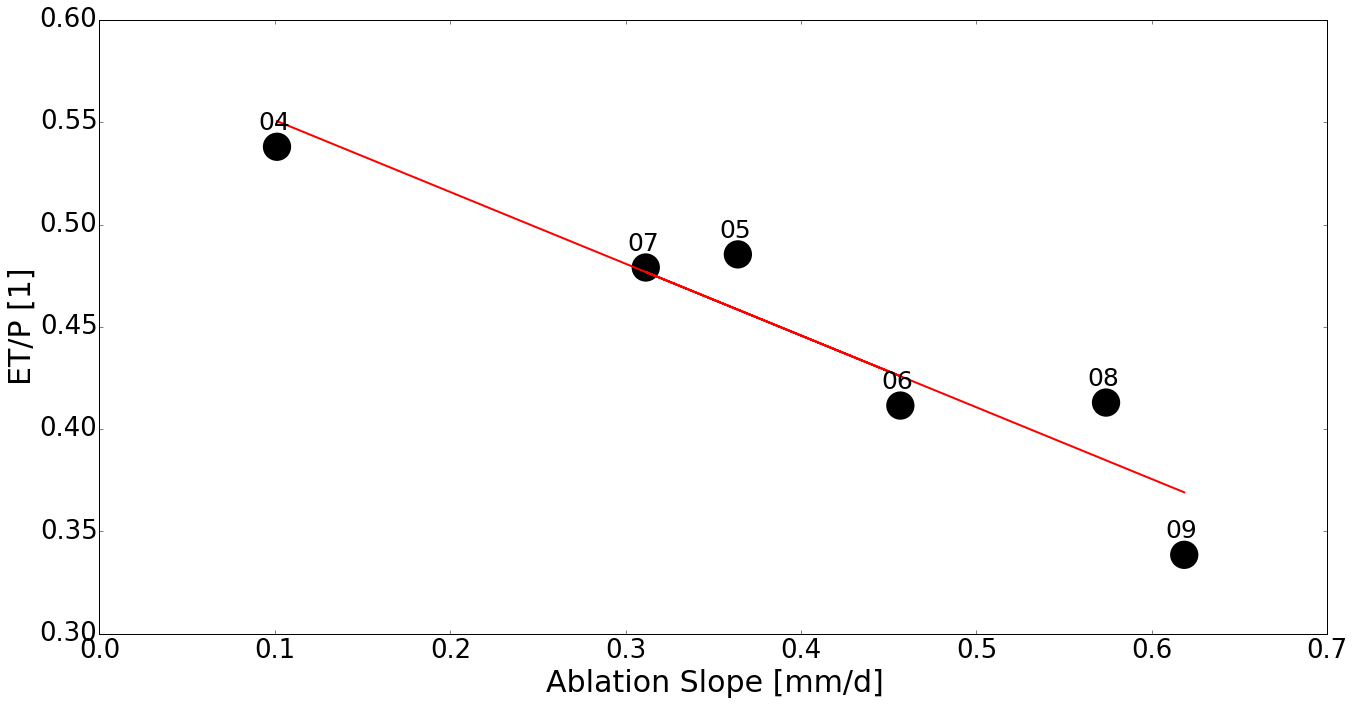

In [75]:
wyrs = ['04','05','06','07','08','09','10','11','12']
annotatey = [0.57,0.55,0.53,0.51,0.46,0.43,0.4]

ttl = 'Growing Season Partitioning vs Ablation Slope'
x = SWE.ablationrate
xlab = 'Ablation Slope [mm/d]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
annotatex = 18
out = './figures/gsET_vs_AblationSlp_CRN.pdf'


#######################################
x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

#plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-', lw = 2)

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 

#plt.legend(['All data'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

#plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
#plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
#plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
#plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)
    

#plt.text(.5,0.83,'A', fontsize = eqtext+30);
    
#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

**Figure 2:** The relationship from Figure 1 holds when only growing season ET (date of peak SWE to September 30th) is considered.

In [76]:
plt.bar(wx['2004-10-01':'2005-09-30'].index, wx.loc['2004-10-01':'2005-09-30','precip'], facecolor='k')
plt.ylabel('[mm]', fontsize=18)
plt.title('WY 2005 Precipitation',fontsize=24);

KeyError: 'the label [precip] is not in the [columns]'

**With 2008:**
pValue: 0.388727495796
Slope: -5.801527315
Intercept: 0.538501591763

**Without 2008:**
pValue: 0.445995543589
Slope: -5.85811169429
Intercept: 0.546193759899


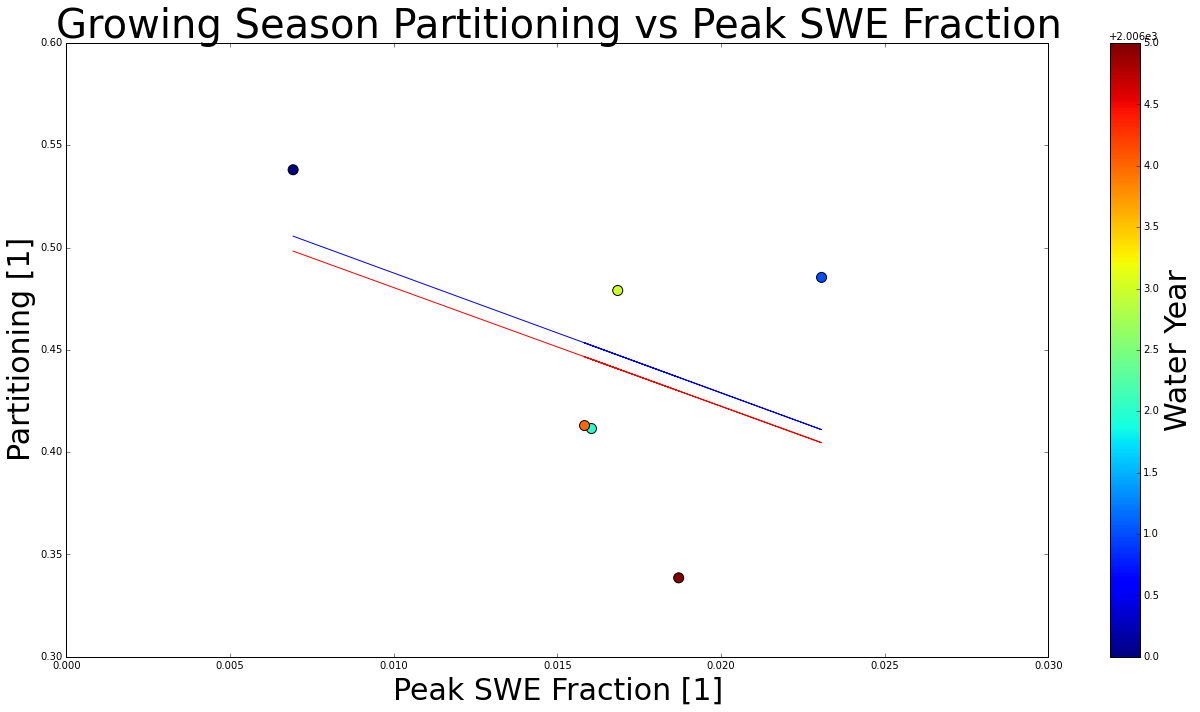

In [77]:
ttl = 'Growing Season Partitioning vs Peak SWE Fraction'
x = MET.peakSWEFrac
xlab = 'Peak SWE Fraction [1]'
y = MET.growPartitioning
ylab = 'Partitioning [1]'

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = SWE.index)
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')


## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')
############################################
print '**With 2008:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)
print
print '**Without 2008:**'
print 'pValue: ' + str(p_value2)
print 'Slope: ' + str(slope2)
print 'Intercept: ' + str(intercept2)

**With 2008:**
pValue: 0.79868854493
Slope: -0.381549220184
Intercept: 0.655785312652

**Without 2008:**
pValue: 0.836732144721
Slope: -0.354186318339
Intercept: 0.647004252758


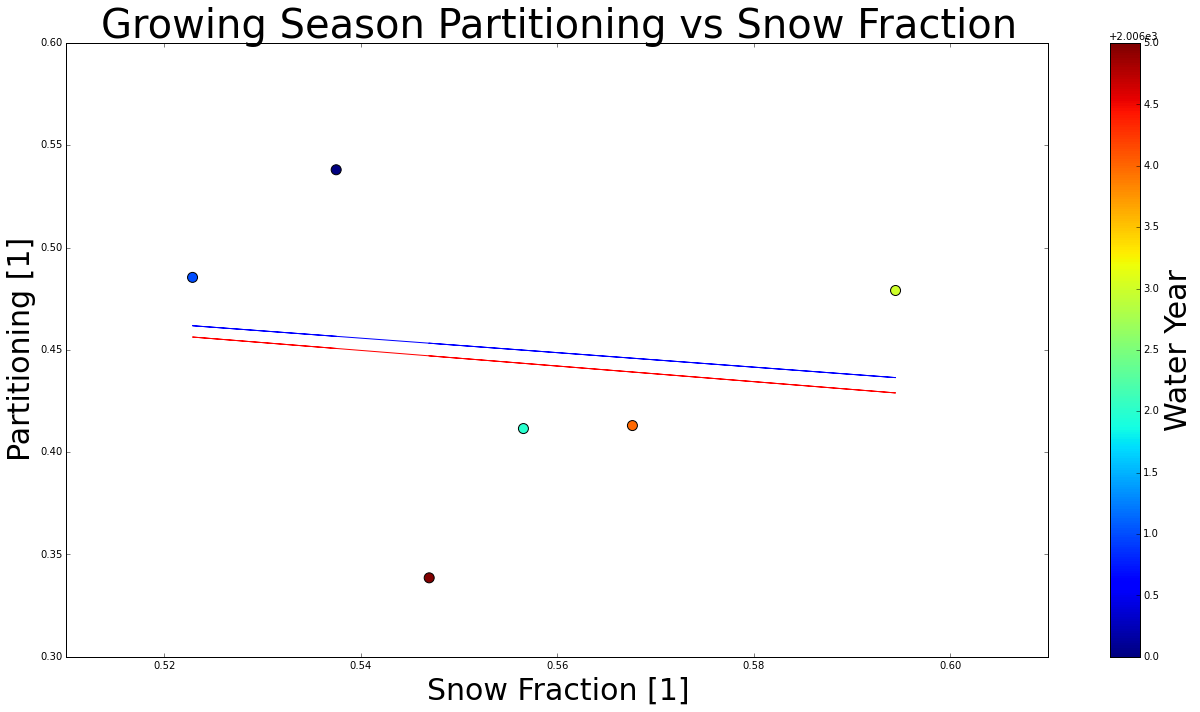

In [78]:
ttl = 'Growing Season Partitioning vs Snow Fraction'
x = P.snowFraction
xlab = 'Snow Fraction [1]'
y = MET.growPartitioning
ylab = 'Partitioning [1]'

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = SWE.index)
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')
############################################
print '**With 2008:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)
print
print '**Without 2008:**'
print 'pValue: ' + str(p_value2)
print 'Slope: ' + str(slope2)
print 'Intercept: ' + str(intercept2)

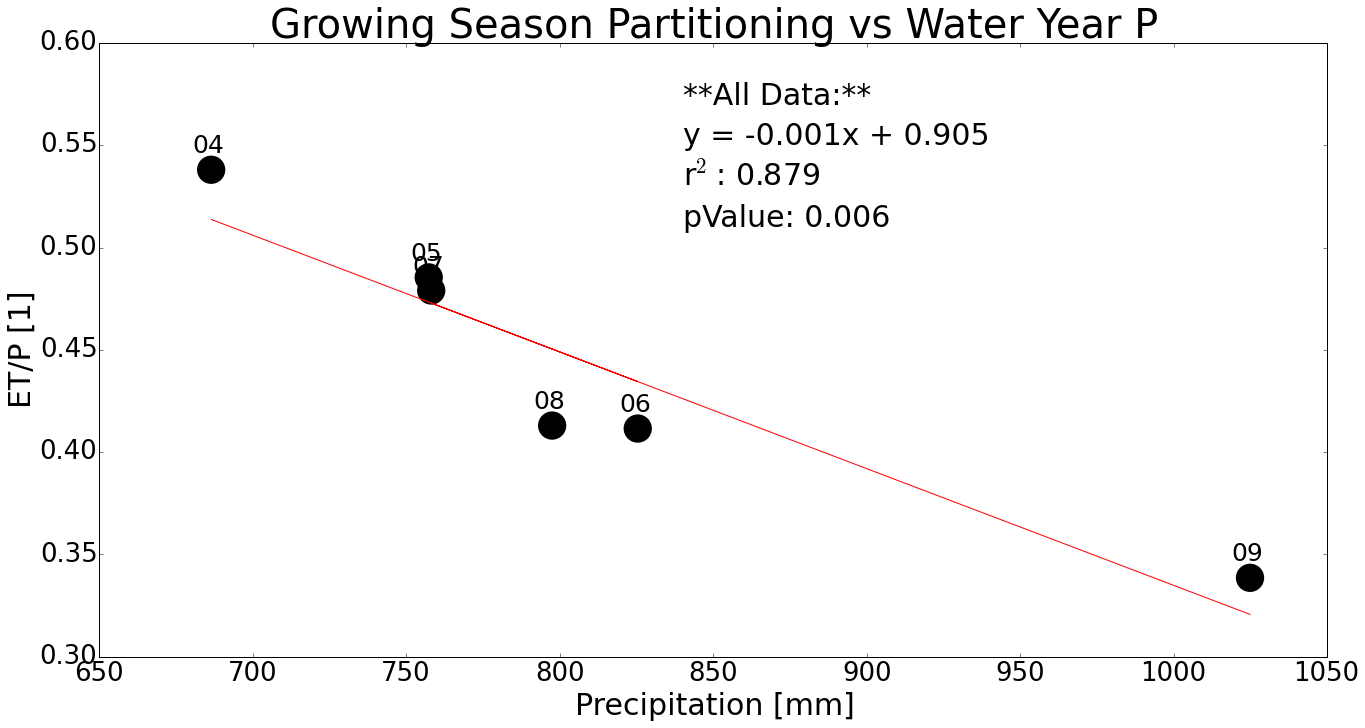

In [79]:
wyrs = ['04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning vs Water Year P'
x = P.wyP
xlab = 'Precipitation [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_Precip_CRN.pdf'
annotatex = 840
#annotatey = [0.85,0.83,0.81,0.79,0.76,0.74,0.72,0.70]

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 

#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

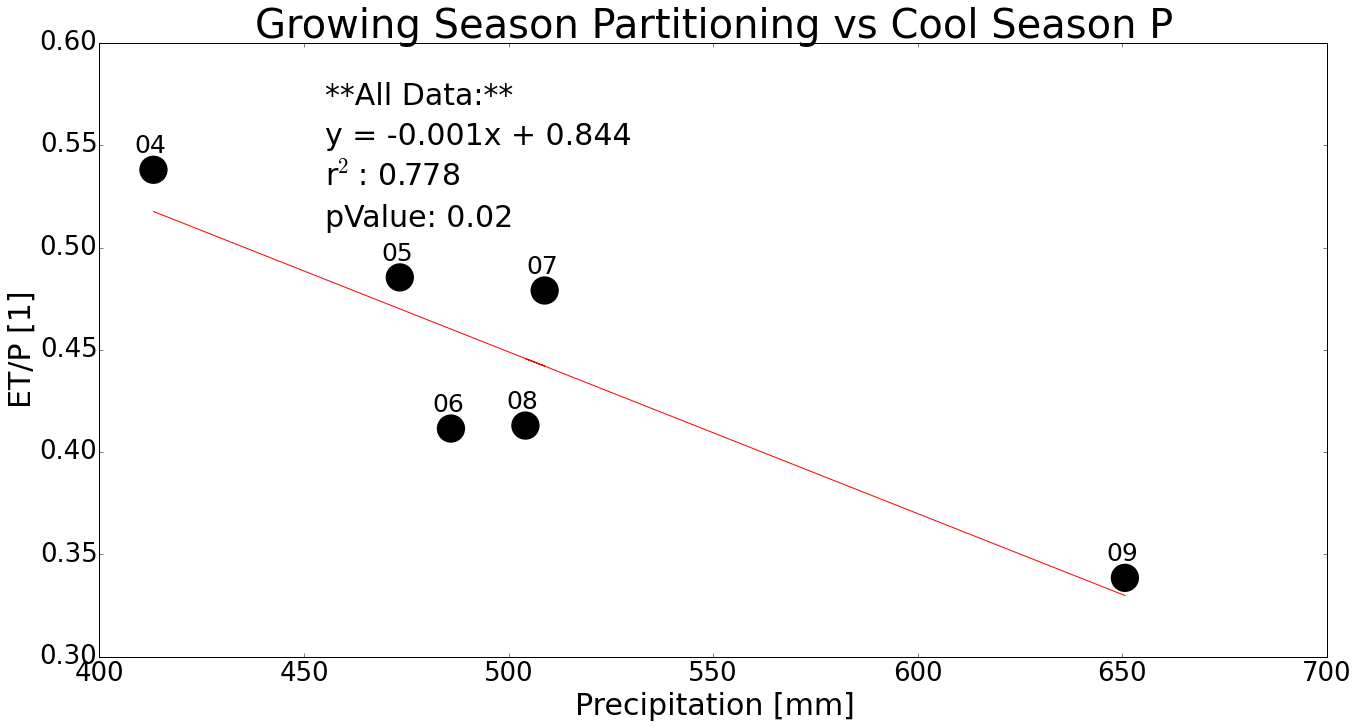

In [80]:
wyrs = ['04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning vs Cool Season P'
x = P.coolP
xlab = 'Precipitation [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_CoolPrecip_CRN.pdf'
#annotatey = [0.85,0.83,0.81,0.79,0.76,0.74,0.72,0.70]
annotatex = 455

#######################################

x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 

#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

This suggests that cool season P magnitude controls how P is partitioned between ET and R

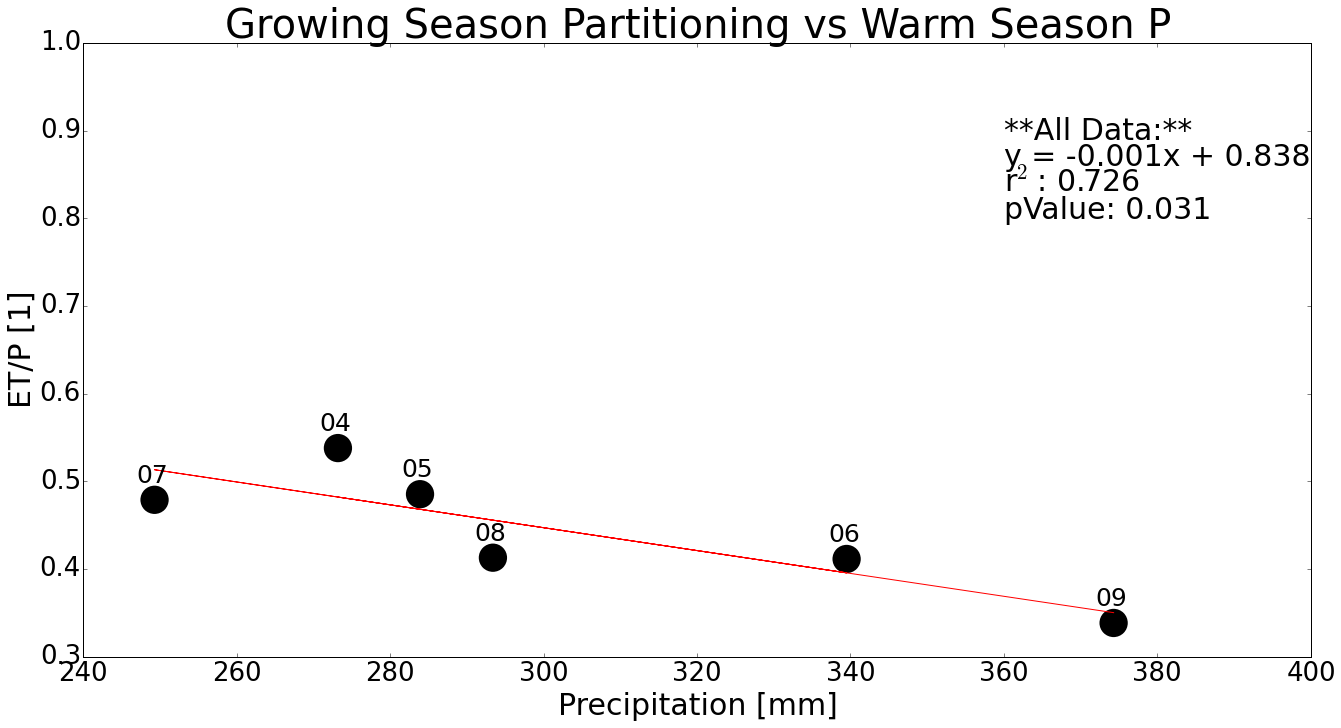

In [81]:
wyrs = ['04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning vs Warm Season P'
x = P.warmP
xlab = 'Precipitation [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_WarmPrecip.pdf'
annotatey = [0.89,0.86,0.83,0.80,0.76,0.73,0.70,0.67]

annotatex = 360

#######################################

x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
plt.ylim([0.3,1])

#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

This suggests that warm season P has little bearing on how growing season ET is paritioned.

**With 2008:**
pValue: 0.118395570124
Slope: -0.00991447472358
Intercept: 0.576560190659

**Without 2008:**
pValue: 0.165577027798
Slope: -0.00994599169383
Intercept: 0.583720265007


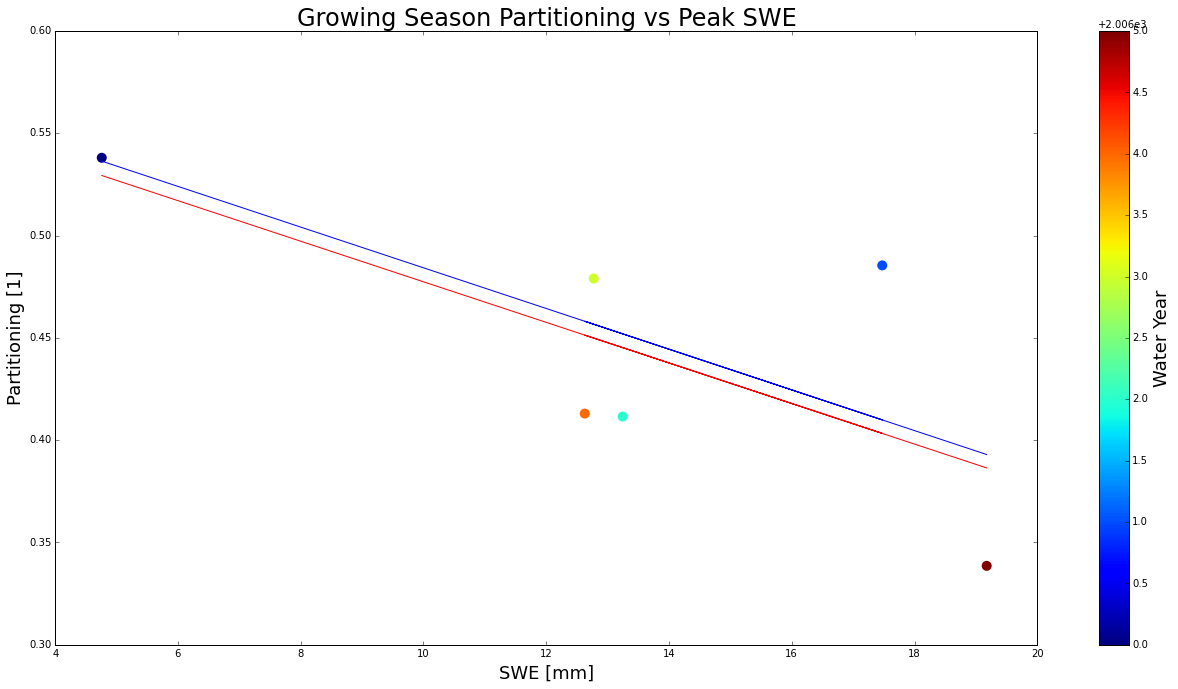

In [82]:
ttl = 'Growing Season Partitioning vs Peak SWE'
x = SWE.peakswe
xlab = 'SWE [mm]'
y = MET.growPartitioning
ylab = 'Partitioning [1]'

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = SWE.index, edgecolor='none')
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = 18)

plt.title(ttl, fontsize = 24)
plt.ylabel(ylab, fontsize = 18)
plt.xlabel(xlab, fontsize = 18)
plt.plot(x, yvals, 'r-')


## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')
############################################
print '**With 2008:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)
print
print '**Without 2008:**'
print 'pValue: ' + str(p_value2)
print 'Slope: ' + str(slope2)
print 'Intercept: ' + str(intercept2)

This is also significant when 2008 is removed. Why is this?

/Users/barnhatb/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:133: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


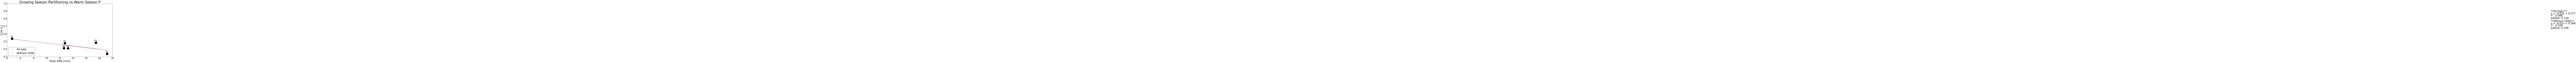

In [83]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

wyrs = ['02','03','04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning vs Warm Season P'
x = SWE.peakswe
xlab = 'Peak SWE [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_PeakSWE.pdf'
annotatey = [0.89,0.86,0.83,0.80,0.76,0.73,0.70,0.67]

annotatex = 390

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')


## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
plt.ylim([0.3,1])
plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

EQ = 'y = '+str(round(slope2,3))+'x + '+str(round(intercept2,3))

plt.text(annotatex,annotatey[4],'**Without 2008:**', fontsize = eqtext)
plt.text(annotatex,annotatey[5],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[6],'r$^2$: '+str(round(r_value2**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[7],'pValue: ' + str(round(p_value2,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

In [114]:
wyears

Int64Index([2006, 2007, 2008, 2009, 2010, 2011], dtype='int64')

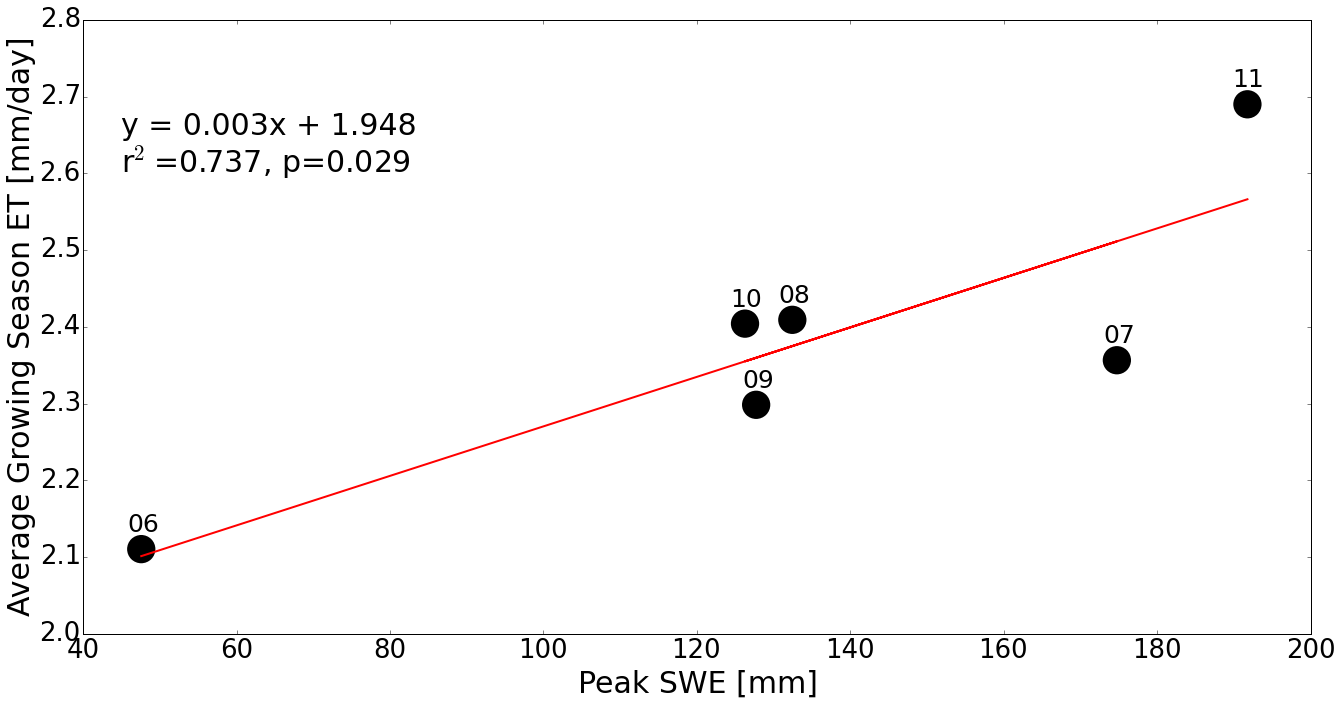

In [124]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

wyrs = ['06','07','08','09','10','11']
ttl = 'Growing Season ET vs Peak SWE'
x = SWE.peakswe*10.
xlab = 'Peak SWE [mm]'
y = ET.aveGrowET
ylab = 'Average Growing Season ET [mm/day]'
out = '/Users/barnhatb/Dropbox/CUB/05_Spring_2015/NASA NESSF/figures/gsETvsPeakSWE.png'
annotatey = [2.7,2.65,2.6,2.55]

annotatex = 45

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

#plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-', lw = 2)


## regression without 2008

#x = x[x.index!=exclude]
#y = y[y.index!=exclude]

#slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
#yvals = linpred(slope2, intercept2, x)

#plt.plot(x, yvals, 'b-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
#plt.ylim([0.3,1])
#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$='+str(round(r_value**2,3))+', p='+str(round(p_value,3)), fontsize = eqtext)
#plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)


for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-12,17), ha='left',
                textcoords='offset points', fontsize=25)

plt.savefig(out,transparent = True, bbox_inches = 'tight')

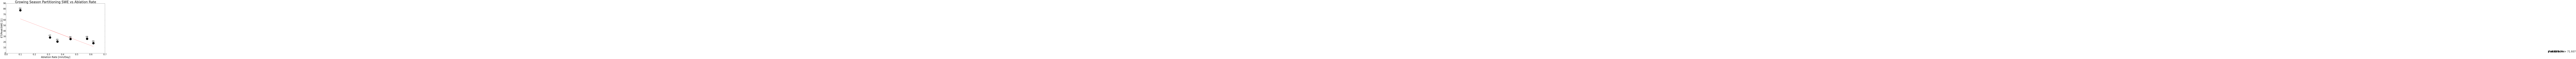

In [106]:
printfigs = True

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

wyrs = ['04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning SWE vs Ablation Rate'
x = SWE.ablationrate
xlab = 'Ablation Rate [mm/Day]'
y = MET.wyGrowPartitioningSWE
ylab = 'ET/PeakSWE [1]'
out = './figures/gsETSWE_vs_PeakSWE_CRN.jpg'
annotatey = [1.72,1.65,1.58,1.51]

annotatex = 18

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')


## regression without 2008

#x = x[x.index!=exclude]
#y = y[y.index!=exclude]

#slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
#yvals = linpred(slope2, intercept2, x)

#plt.plot(x, yvals, 'b-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
#plt.ylim([0.3,1])
#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

#EQ = 'y = '+str(round(slope2,3))+'x + '+str(round(intercept2,3))

#plt.text(annotatex,annotatey[4],'**Without 2008:**', fontsize = eqtext)
#plt.text(annotatex,annotatey[5],EQ, fontsize = eqtext)
#plt.text(annotatex,annotatey[6],'r$^2$: '+str(round(r_value2**2,3)), fontsize = eqtext)
#plt.text(annotatex,annotatey[7],'pValue: ' + str(round(p_value2,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

In [85]:
wyears

Int64Index([2006, 2007, 2008, 2009, 2010, 2011], dtype='int64')

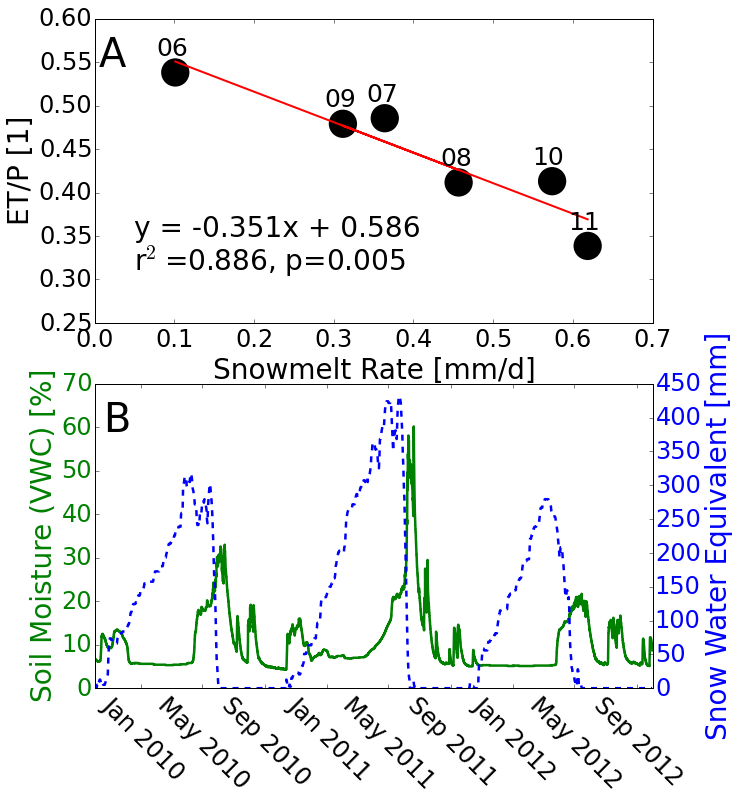

In [123]:
wyrs = ['06','07','08','09','10','11']

ttl = 'Growing Season Partitioning vs Ablation Slope'
x = SWE.ablationrate
xlab = 'Snowmelt Rate [mm/d]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
annotatex = 0.05
out = '/Users/barnhatb/Dropbox/CUB/05_Spring_2015/NASA NESSF/figures/partitioning_swe_sm.png'
annotatey = [0.35,0.31,0.51,0.80,0.76,0.73,0.70,0.67]

#######################################
fig = plt.figure(figsize=[10,12])
plt.subplot(2,1,1)

x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

#plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont-2)
plt.xlabel(xlab, fontsize = axfont-2)
plt.plot(x, yvals, 'r-', lw = 2)

plt.setp(ax.get_xticklabels(), fontsize=axtickfont-2)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont-2)
#cb.ax.tick_params(labelsize=axtickfont) 

#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize-6)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],EQ, fontsize = eqtext-2)
plt.text(annotatex,annotatey[1],'r$^2$='+str(round(r_value**2,3))+', p='+str(round(p_value,3)), fontsize = eqtext-2)
#plt.text(annotatex,annotatey[2],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)
    

plt.text(0.005,0.545,'A', fontsize = eqtext+10);
    
#plt.text(x,y,wyrs);
#plt.show

plt.subplot(2,1,2)

strt = '2009-10-01'
nd = '2012-10-01'
plt.plot(afx[strt:nd].index, afx[strt:nd].SWC1,'g-', lw = 2.5);
#plt.title('AFX Soil Water Content 1');
plt.ylabel('Soil Moisture (VWC) [%]',fontsize = axfont-2, color = 'g')
#plt.xlabel('Year', fontsize = axfont)

ax = plt.gca();
plt.setp(ax.get_xticklabels(), fontsize=axtickfont-2);
plt.setp(ax.get_yticklabels(), fontsize=axtickfont-2, color = 'g');
plt.xticks(rotation = -45)
plt.text('2009-10-25',59,'B', fontsize = eqtext+10);

ax2 = ax.twinx()

#ax2.plot(niwot[strt:nd].index, niwot[strt:nd].precip, 'b--', lw = 2.5)
ax2.plot(niwot[strt:nd].index,niwot[strt:nd].swe, 'b--', lw = 2.5);
#plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax2.get_yticklabels(), fontsize=axtickfont-2, color = 'b');
ax2.set_ylabel('Snow Water Equivalent [mm]', fontsize = axfont-2, color = 'b');

plt.savefig(out,transparent = True, bbox_inches = 'tight')

# Generate some method's Figures:

In [41]:
afx3 = afx.resample('d',how='sum')

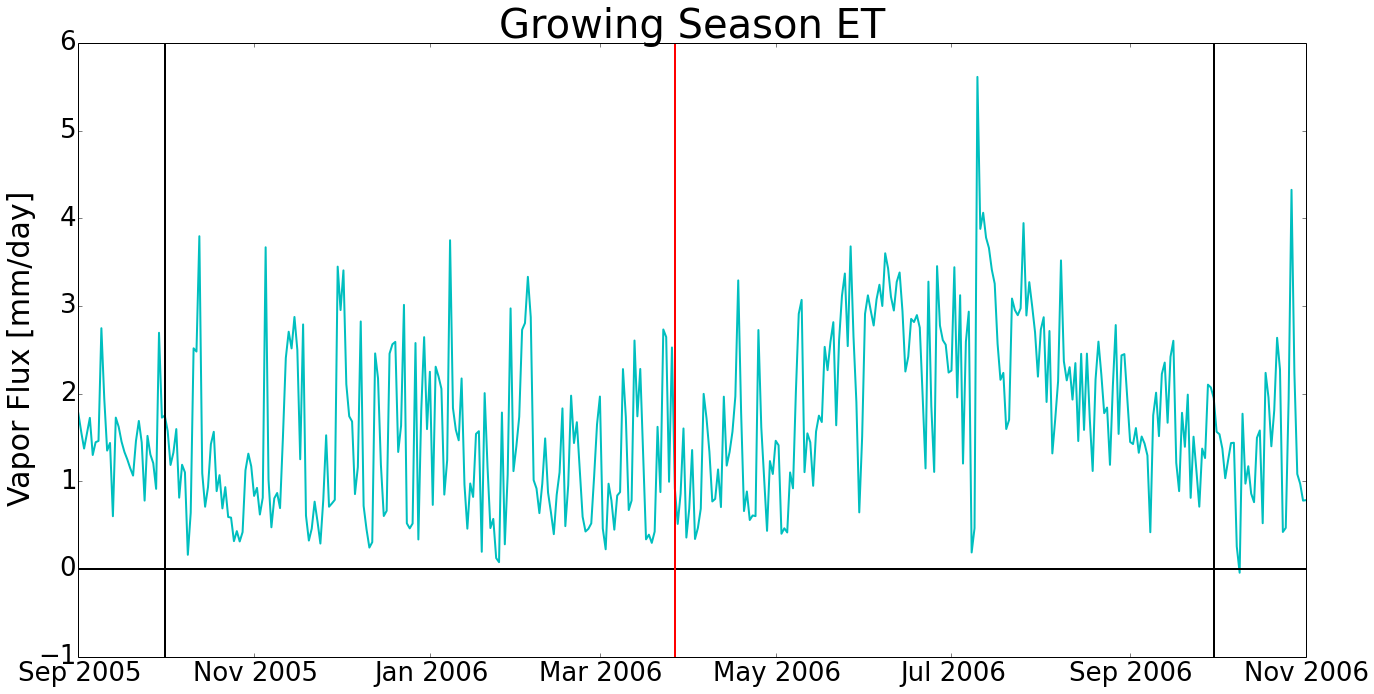

In [42]:
plt.plot(afx3['2005-09-01':'2006-11-01'].index, afx3['2005-09-01':'2006-11-01'].tot_ET, lw = 2, c = 'c')
plt.axhline(0,lw=2,c='k')
plt.axvline('2005-10-01',c='k', lw = 2)
plt.axvline('2006-09-30',c='k', lw = 2)
plt.axvline(SWE.loc[2006].peakswedate, c='r',lw=2)

plt.title('Growing Season ET', fontsize = titlefont)
plt.ylabel('Vapor Flux [mm/day]', fontsize = axfont)

ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont);
if printfigs == True:
    plt.savefig('./figures/growing_season_et.pdf',transparent = True, bbox_inches = 'tight')

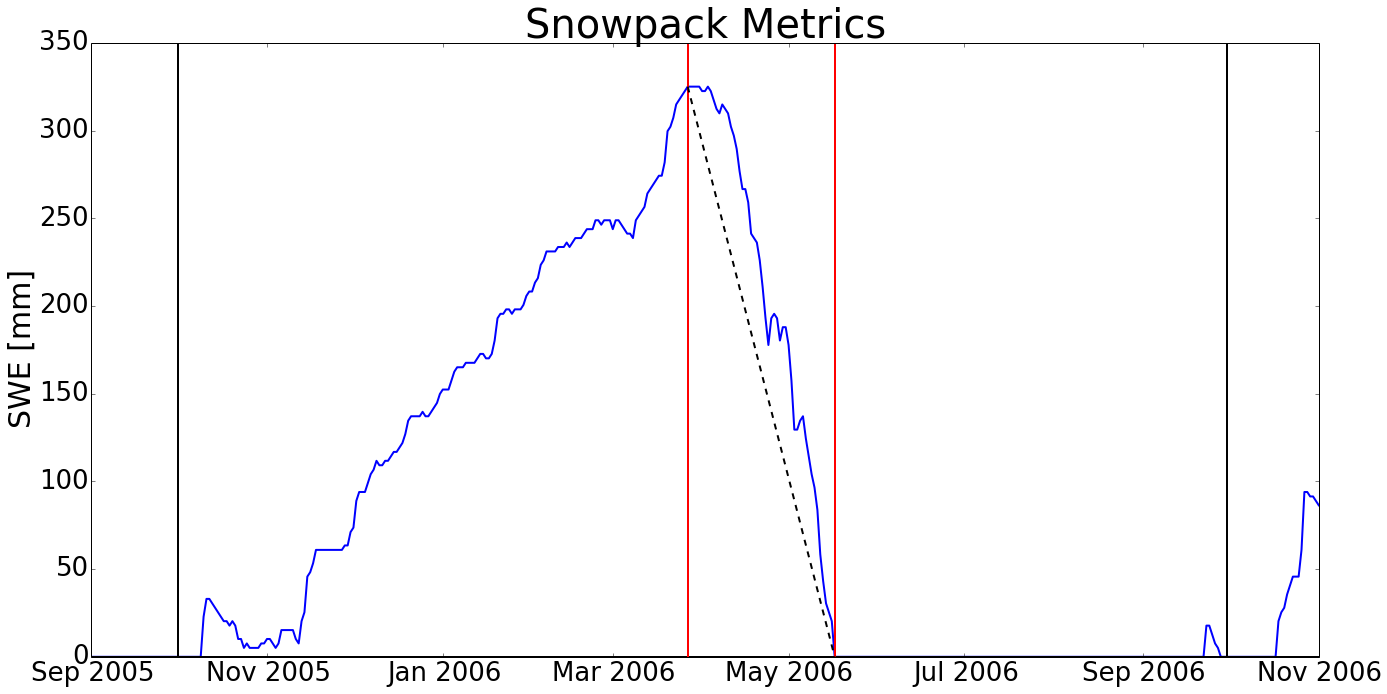

In [43]:
plt.plot(niwot['2005-09-01':'2006-11-01'].index, niwot['2005-09-01':'2006-11-01'].swe, lw = 2, c = 'b');
plt.axhline(0,lw=2,c='k');
plt.axvline('2005-10-01',c='k', lw = 2);
plt.axvline('2006-09-30',c='k', lw = 2);
plt.axvline(SWE.loc[2006].peakswedate, c='r',lw=2);
plt.axvline(SWE.loc[2006].snowfreedate, c='r',lw=2);

plt.plot([SWE.loc[2006].peakswedate, SWE.loc[2006].snowfreedate], [SWE.loc[2006].peakswe, 0], 'k--', lw=2);

plt.title('Snowpack Metrics', fontsize = titlefont);
plt.ylabel('SWE [mm]', fontsize = axfont);

ax = plt.gca();
plt.setp(ax.get_xticklabels(), fontsize=axtickfont);
plt.setp(ax.get_yticklabels(), fontsize=axtickfont);

if printfigs == True:
    plt.savefig('./figures/snowpack_metrics.pdf',transparent = True, bbox_inches = 'tight')

### Make some general Discussion Plots

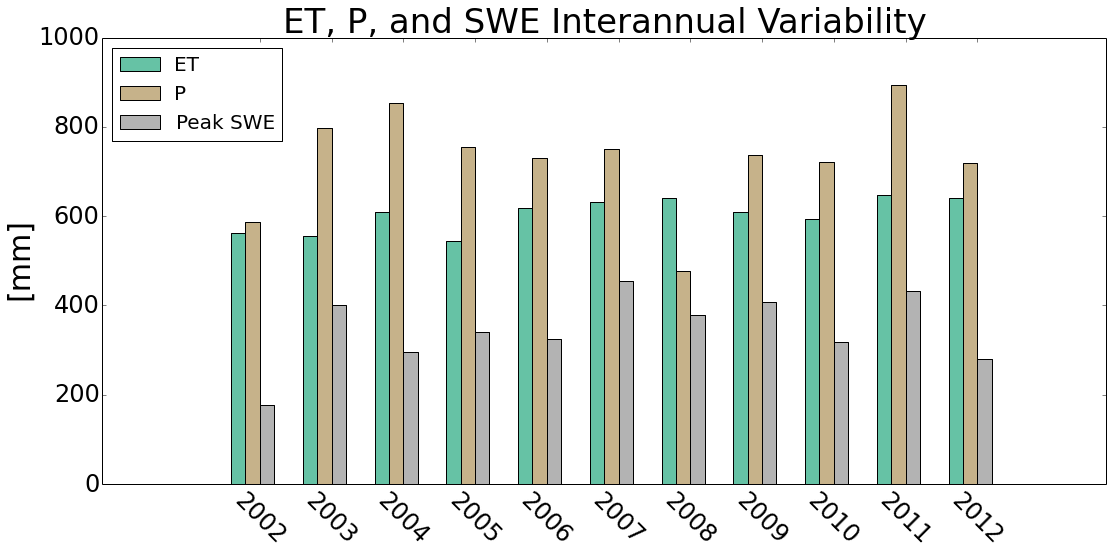

In [44]:
pylab.rcParams['figure.figsize'] = (18.0, 8)

cb = pylab.get_cmap('Set2')
colors = cb(linspace(0.,1.,3))

ind = arange(11)
width = 0.2
plt.bar(ind-width, ET.wyET, width = width, edgecolor='k', facecolor=colors[0])
plt.bar(ind, P.wyP, width = width, edgecolor='k', facecolor=colors[1])
plt.bar(ind+width, SWE.peakswe, edgecolor = 'k', facecolor = colors[2],width=width)

ax = plt.gca()
ax.set_xticks(ind+width)
ax.set_xticklabels(('2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012'),
                   fontsize = 24, rotation = -45);
plt.setp(ax.get_yticklabels(), fontsize=24);
plt.legend(['ET','P','Peak SWE'],'upper left', fontsize=20)
plt.ylabel('[mm]', fontsize = 30)
plt.title('ET, P, and SWE Interannual Variability', fontsize = 34)
plt.ylim([0,1000]);

if printfigs == True:
    plt.savefig('./figures/wateryear_bars.pdf',transparent = True, bbox_inches = 'tight')

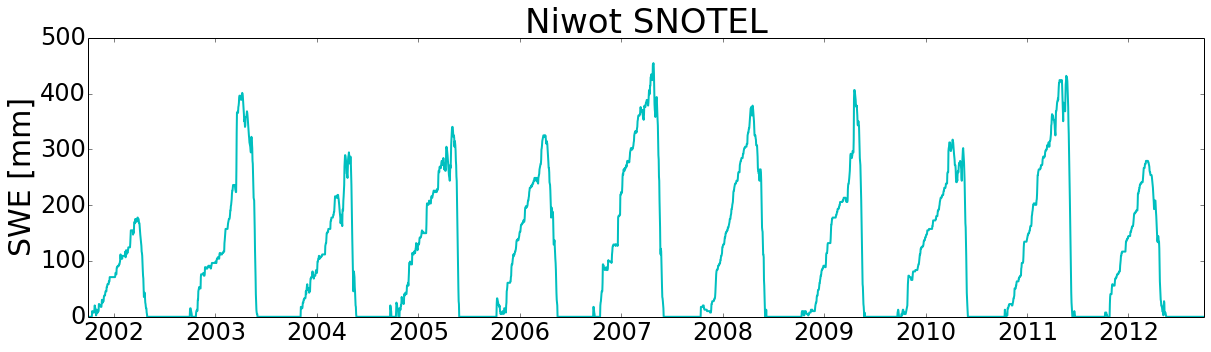

In [45]:
pylab.rcParams['figure.figsize'] = (20.0, 5)

plt.plot(niwot['2001-10-01':'2012-09-30'].index, niwot['2001-10-01':'2012-09-30'].swe, lw=2, c='c')
ax = plt.gca()
plt.setp(ax.get_yticklabels(), fontsize=24);
plt.setp(ax.get_xticklabels(), fontsize=24);
plt.title('Niwot SNOTEL', fontsize=34)
plt.ylabel('SWE [mm]',fontsize = 30)

if printfigs == True:
    plt.savefig('./figures/niwot_snotel.pdf',transparent = True, bbox_inches = 'tight')

## Calculate Partial R2 for a regression of Growing Season ET and ablation slope and swe magnitude

In [148]:
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm

In [141]:
X = SWE[['ablationrate']]
Y = ET['growET']

In [142]:
X = sm.add_constant(X)
mod = sm.OLS(Y,X)
est = mod.fit()

In [143]:
est.ssr

2407.7800920789496

In [144]:
est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
===============================================================
Model:                 OLS       AIC:                   79.8440
Dependent Variable:    growET    BIC:                   80.2385
No. Observations:      9         Log-Likelihood:        -37.922
Df Model:              1         F-statistic:           12.18  
Df Residuals:          7         Prob (F-statistic):    0.0101 
R-squared:             0.635     Scale:                 343.97 
Adj. R-squared:        0.583                                   
---------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------
const        423.8221  15.2773 27.7419 0.0000 387.6970 459.9473
ablationrate  -4.7631   1.3650 -3.4896 0.0101  -7.9907  -1.5355
---------------------------------------------------------------
Omnibus:              1.935       Durbin-Watson:          0.754
Prob(Omnibus):        0.380       Jarque-Bera (JB):       0.928
Skew:                 0.763       Prob(JB):               0.629
Kurtosis:             2.615       Condition No.:          28   
===============================================================

"""

In [116]:
SWE.columns

Index([u'peakswe', u'peakswedate', u'snowfreedate', u'ablationrate', u'ablationseason', u'growseasonlength'], dtype='object')

In [117]:
ET.columns

Index([u'wyET', u'growET', u'aveGrowET'], dtype='object')

In [150]:
anova_lm(mod)

AttributeError: 'OLS' object has no attribute 'model'